# Tarea 2

In [1]:
import numpy as np
import scipy as sp
from scipy import interpolate 
import matplotlib.pyplot as plt

In [2]:
N=10

Usando interpolación lineal:

In [3]:
x=np.linspace(0,2*np.pi,N)
f=interpolate.interp1d(x,(np.sin(x))**2,kind="linear")

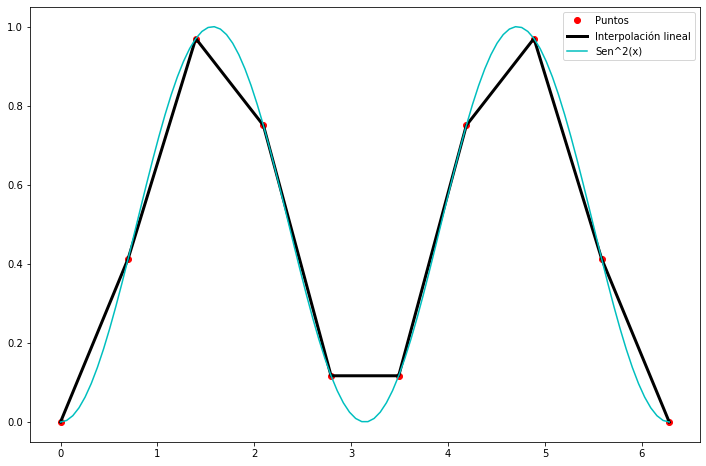

In [4]:
X=np.linspace(0,2*np.pi, 100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(X,f(X),"k-",lw=3,label="Interpolación lineal")
plt.plot(X,(np.sin(X))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()

Usando interpolación de Lagrange: 

In [5]:
L=interpolate.lagrange(x,(np.sin(x))**2)
print(L)

            9            8           7          6         5         4
-7.589e-19 x - 0.001256 x + 0.03157 x - 0.3135 x + 1.548 x - 3.899 x
         3         2
 + 4.57 x - 2.022 x + 0.784 x


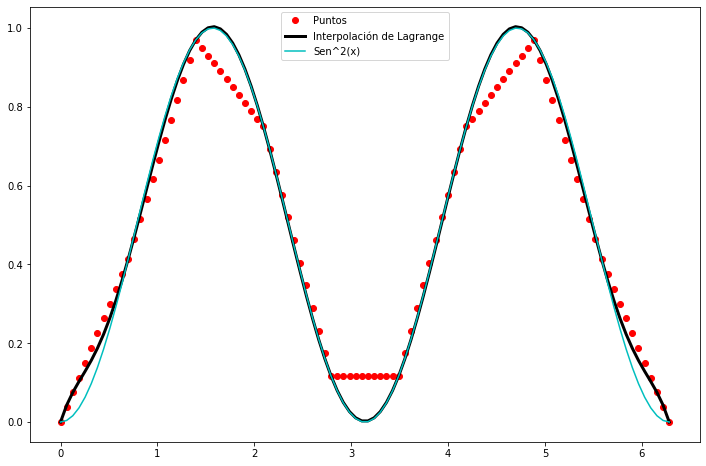

In [40]:
X=np.linspace(0,2*np.pi,100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(X,L(X),"k-",lw=3,label="Interpolación de Lagrange")
plt.plot(X,(np.sin(X))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()

Usando Hermite:

In [41]:
X=np.linspace(0,2*np.pi, 100)
y=(np.sin(x))**2
yprime=np.sin(2*x)

In [42]:
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
# and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
# differences using derivatives
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum    



Hinterp = hermite(x, y, yprime, X)
Hinterp

array([ 0.00000000e+00,  4.02266142e-03,  1.60258052e-02,  3.58162281e-02,
        6.30754954e-02,  9.73650161e-02,  1.38133079e-01,  1.84723723e-01,
        2.36387294e-01,  2.92292503e-01,  3.51539814e-01,  4.13175911e-01,
        4.76209043e-01,  5.39624981e-01,  6.02403338e-01,  6.63533986e-01,
        7.22033311e-01,  7.76960035e-01,  8.27430369e-01,  8.72632226e-01,
        9.11838291e-01,  9.44417724e-01,  9.69846310e-01,  9.87714894e-01,
        9.97735962e-01,  9.99748272e-01,  9.93719445e-01,  9.79746487e-01,
        9.58054229e-01,  9.28991707e-01,  8.93026548e-01,  8.50737444e-01,
        8.02804844e-01,  7.50000000e-01,  6.93172563e-01,  6.33236907e-01,
        5.71157419e-01,  5.07932982e-01,  4.44580900e-01,  3.82120532e-01,
        3.21556889e-01,  2.63864463e-01,  2.09971545e-01,  1.60745294e-01,
        1.16977778e-01,  7.93732336e-02,  4.85367309e-02,  2.49644412e-02,
        9.03565144e-03,  1.00666185e-03,  1.00666185e-03,  9.03565144e-03,
        2.49644412e-02,  

In [43]:
P=np.poly1d(Hinterp)
print (P)

          98           97           96           95           94
0.004023 x  + 0.01603 x  + 0.03582 x  + 0.06308 x  + 0.09737 x 
           93          92          91          90          89
 + 0.1381 x  + 0.1847 x  + 0.2364 x  + 0.2923 x  + 0.3515 x 
           88          87          86          85          84
 + 0.4132 x  + 0.4762 x  + 0.5396 x  + 0.6024 x  + 0.6635 x 
          83         82          81          80          79          78
 + 0.722 x  + 0.777 x  + 0.8274 x  + 0.8726 x  + 0.9118 x  + 0.9444 x 
           77          76          75          74          73
 + 0.9698 x  + 0.9877 x  + 0.9977 x  + 0.9997 x  + 0.9937 x 
           72          71         70         69          68          67
 + 0.9797 x  + 0.9581 x  + 0.929 x  + 0.893 x  + 0.8507 x  + 0.8028 x 
         66          65          64          63          62          61
 + 0.75 x  + 0.6932 x  + 0.6332 x  + 0.5712 x  + 0.5079 x  + 0.4446 x 
           60          59          58        57          56         55
 +

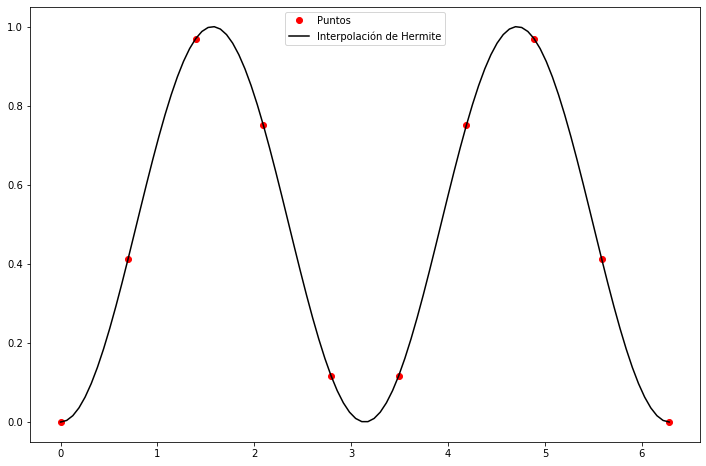

In [46]:
Y=np.linspace(0, 2*np.pi,100)
plt.figure(figsize=(12,8))
plt.plot(x,f(x),"ro",label="Puntos")
plt.plot(Y,P(Y),"k-",lw=3,label="Interpolación de Hermite")
plt.plot(Y,(np.sin(Y))**2,"c-",label="Sen^2(x)")
plt.legend()

plt.show()